In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('train/train.tsv', header=None, sep='\t')
df.columns = ['price', 'isNew', 'rooms', 'floor', 'location', 'sqrMetres']
df = pd.DataFrame(df, columns = ['price', 'isNew', 'rooms', 'floor', 'sqrMetres'])
df.head()

,price,isNew,rooms,floor,sqrMetres
0,476118,False,3,1,78
1,459531,False,3,2,62
2,411557,False,3,0,15
3,496416,False,4,0,14
4,406032,False,3,0,15


In [3]:
print df.corr()

              price     isNew     rooms     floor  sqrMetres
price      1.000000  0.034873  0.508833 -0.068882   0.422073
isNew      0.034873  1.000000  0.008730 -0.062179   0.083835
rooms      0.508833  0.008730  1.000000 -0.078585   0.377587
floor     -0.068882 -0.062179 -0.078585  1.000000  -0.055053
sqrMetres  0.422073  0.083835  0.377587 -0.055053   1.000000


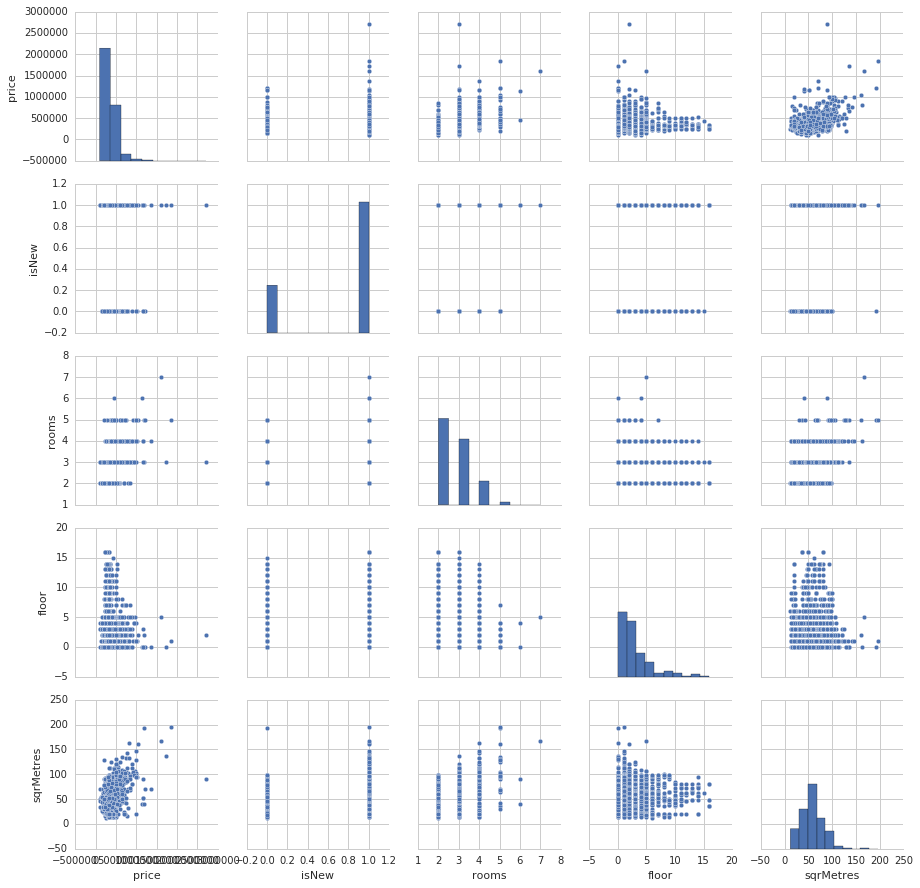

In [4]:
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['price', 'isNew', 'rooms', 'floor', 'sqrMetres']
sns.pairplot(df[cols], size=2.5)
plt.show()

In [5]:
# Największa zależność widoczna jest pomiędzy sqrMetres czyli powierzchnią a ceną. 

In [6]:
from sklearn.linear_model import LinearRegression
X = pd.DataFrame(df, columns = ['sqrMetres'])
lm = LinearRegression()
lm.fit(X, df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
print 'Punkt przecięcia:', lm.intercept_
print 'Liczba współczynników:', len(lm.coef_)

Punkt przecięcia: 193805.529011
Liczba współczynników: 1


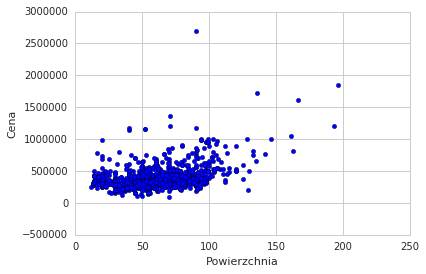

In [8]:
plt.scatter(df.sqrMetres, df.price)
plt.xlabel ('Powierzchnia')
plt.ylabel ('Cena')
plt.show()

In [9]:
lm.predict(X)

array([ 427594.09094632,  379637.46285707,  238764.86784492, ...,
        388629.33062381,  394623.90913496,  343669.99179014])

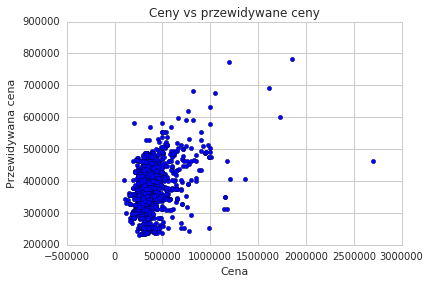

In [10]:
plt.scatter(df.price, lm.predict(X))
plt.xlabel('Cena')
plt.ylabel('Przewidywana cena')
plt.title('Ceny vs przewidywane ceny')


In [11]:
mseFull = np.mean((df.price -lm.predict(X)) ** 2)
print mseFull

22086079286.9


In [12]:
rd = pd.read_csv('dev-0/in.tsv', sep='\t', names=['isNew', 'rooms', 'floor', 'location', 'sqrMetres'])

In [17]:
tk = lm.predict(pd.DataFrame(rd, columns=['sqrMetres']))

array([  289718.78518974,   325686.25625667,   622417.89255887,
         307702.52072321,   343669.99179014,   466558.85126883,
         286721.49593416,   403615.7769017 ,   433588.66945747,
         439583.24796863,   229773.00007819,   418602.22317959,
         331680.83476783,   469556.14052441,   490537.16531345,
         415604.93392401,   307702.52072321,   364651.01657919,
         373642.88434592,   472553.42977998,   424596.80169074,
         406613.06615727,   355659.14881245,   304705.23146763,
         436585.95871305,   421599.51243516,   334678.12402341,
         394623.90913496,   379637.46285707,   325686.25625667,
         484542.5868023 ,   373642.88434592,   325686.25625667,
         370645.59509034,   322688.9670011 ,   355659.14881245,
         382634.75211265,   325686.25625667,   328683.54551225,
         412607.64466843,   415604.93392401,   292716.07444532,
         385632.04136823,   253751.31412281,   358656.43806803,
         355659.14881245,   373642.88434

In [39]:
ui = pd.read_csv('test-A/in.tsv', sep='\t', names=['isNew', 'rooms', 'floor', 'location', 'sqrMetres'])
ui.head()

,isNew,rooms,floor,location,sqrMetres
0,True,2,3,Rataje,38
1,True,3,7,Wilda,20
2,True,4,4,Piątkowo,73
3,False,3,2,Stare,78
4,True,3,1,Nowe,56


In [41]:
lm.predict(pd.DataFrame(ui, columns=['sqrMetres']))

array([ 307702.52072321,  253751.31412281,  412607.64466843,
        427594.09094632,  361653.72732361,  406613.06615727,
        373642.88434592,  253751.31412281,  454569.69424652,
        373642.88434592,  283724.20667859,  421599.51243516,
        340672.70253456,  253751.31412281,  343669.99179014,
        388629.33062381,  295713.3637009 ,  343669.99179014,
        364651.01657919,  253751.31412281,  340672.70253456,
        331680.83476783,  274732.33891185,  358656.43806803,
        337675.41327899,  388629.33062381,  445577.82647979,
        433588.66945747,  325686.25625667,  340672.70253456,
        331680.83476783,  415604.93392401,  463561.56201325,
        373642.88434592,  388629.33062381,  337675.41327899,
        673371.8099037 ,  298710.65295647,  262743.18188954,
        430591.3802019 ,  307702.52072321,  406613.06615727,
        607431.44628098,  433588.66945747,  322688.9670011 ,
        253751.31412281,  430591.3802019 ,  592445.0000031 ,
        340672.70253456,

In [42]:
len(lm.predict(pd.DataFrame(ui, columns=['sqrMetres'])))

150